# Training And Testing Available Data

**We have a dataset containing prices of used BMW cars. We are going to analyze this dataset and build a prediction function that can predict a price by taking mileage and age of the car as input. We will use sklearn train_test_split method to split training and testing dataset**

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("carprices.csv")
df

,Mileage,Age(yrs),Sell Price($)
0,69000,6,18000
1,35000,3,34000
2,57000,5,26100
3,22500,2,40000
4,46000,4,31500
5,59000,5,26750
6,52000,5,32000
7,72000,6,19300
8,91000,8,12000
9,67000,6,22000


In [3]:
df.head()

,Mileage,Age(yrs),Sell Price($)
0,69000,6,18000
1,35000,3,34000
2,57000,5,26100
3,22500,2,40000
4,46000,4,31500


In [4]:
df.sample(4)

,Mileage,Age(yrs),Sell Price($)
14,82450,7,19400
12,59000,5,26000
5,59000,5,26750
15,25400,3,35000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Mileage        20 non-null     int64
 1   Age(yrs)       20 non-null     int64
 2   Sell Price($)  20 non-null     int64
dtypes: int64(3)
memory usage: 612.0 bytes


In [6]:
import matplotlib.pyplot as plt

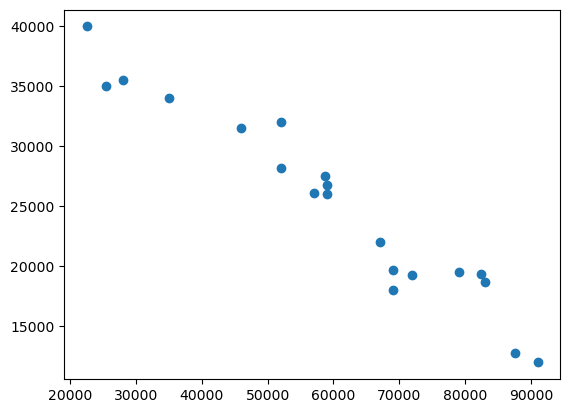

In [8]:
# Car Mileage VS Sell Price
plt.scatter(df["Mileage"],df["Sell Price($)"])
plt.show()

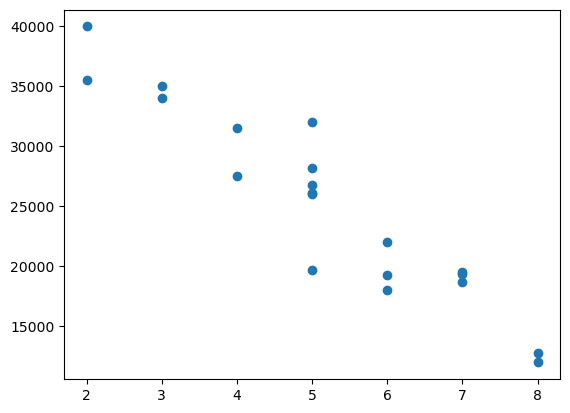

In [9]:
# Car Age Vs Sell Price ($)
plt.scatter(df['Age(yrs)'],df['Sell Price($)'])

**Looking at above two scatter plots, using linear regression model makes sense as we can clearly see a linear relationship between our dependant (i.e. Sell Price) and independant variables (i.e. car age and car mileage)**

**The approach we are going to use here is to split available data in two sets**

**Training: We will train our model on this dataset**

**Testing: We will use this subset to make actual predictions using trained model The reason we don't use same training set for testing is because our model has seen those samples before, using same samples for making predictions might give us wrong impression about accuracy of our model. It is like you ask same questions in exam paper as you tought the students in the class.**

In [4]:
X = df[['Mileage','Age(yrs)']]
X

,Mileage,Age(yrs)
0,69000,6
1,35000,3
2,57000,5
3,22500,2
4,46000,4
5,59000,5
6,52000,5
7,72000,6
8,91000,8
9,67000,6


In [12]:
len(X)

20

In [5]:
y = df['Sell Price($)']
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     26750
6     32000
7     19300
8     12000
9     22000
10    18700
11    19500
12    26000
13    27500
14    19400
15    35000
16    35500
17    19700
18    12800
19    28200
Name: Sell Price($), dtype: int64

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [16]:
len(X_train)

14

In [17]:
len(X_test)

6

In [18]:
y_train

16    35500
0     18000
9     22000
4     31500
1     34000
3     40000
11    19500
7     19300
2     26100
6     32000
17    19700
19    28200
18    12800
12    26000
Name: Sell Price($), dtype: int64

In [19]:
y_test

8     12000
14    19400
10    18700
15    35000
5     26750
13    27500
Name: Sell Price($), dtype: int64

In [7]:
# Lets run linear regression model now
# This is the same work as linear regression

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [21]:
X_test

,Mileage,Age(yrs)
8,91000,8
14,82450,7
10,83000,7
15,25400,3
5,59000,5
13,58780,4


In [8]:
prediction = reg.predict(X_test)

In [23]:
y_test

8     12000
14    19400
10    18700
15    35000
5     26750
13    27500
Name: Sell Price($), dtype: int64

In [9]:
reg.score(X_test,y_test)

0.8888072594463126

In [10]:
prediction

array([30546.0183698 , 37426.17204347, 22077.23374216, 21124.05516978,
       26470.48915138, 25835.03676979])

In [13]:
prediction2 = reg.predict([[10000,50]])
prediction2

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([15279.2697335])

In [16]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1677.8158278659848
MSE: 4257608.64439116
RMSE: 2063.3973549443067


Text(0, 0.5, 'Predicted Y')

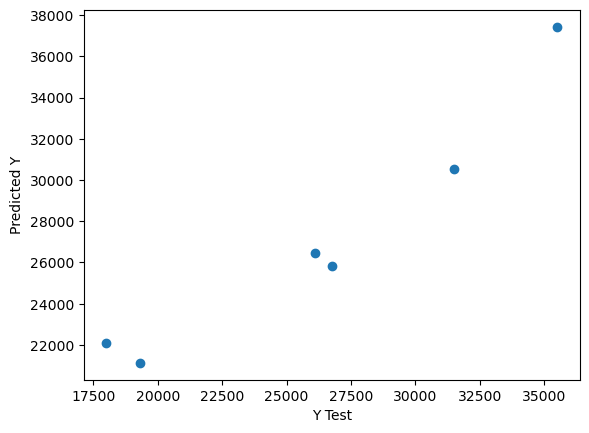

In [17]:
import matplotlib.pyplot as plt
plt.scatter(y_test,prediction)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')